In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import math
import random
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.svm import SVC


In [3]:
df = pd.read_csv("nhl_game_data/game_teams_stats.csv")
df.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,4,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,4,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


In [4]:
#df['won_true'] = np.where(df['won'] == 'TRUE', 1, 0)
df['won_true'] = df['won'].astype(int)
# drop unnecessary columns
df.drop(['game_id'], axis=1, inplace=True)
df.drop(['team_id'], axis=1, inplace=True)
df.drop(['HoA'], axis=1, inplace=True)
df.drop(['won'], axis=1, inplace=True)
df.drop(['settled_in'], axis=1, inplace=True)
df.drop(['head_coach'], axis=1, inplace=True)
# normalize 
df['shots'] = (df['shots'] - df['shots'].mean()) / (df['shots'].max() - df['shots'].min())
df['hits'] = (df['hits'] - df['hits'].mean()) / (df['hits'].max() - df['hits'].min())
df['pim'] = (df['pim'] - df['pim'].mean()) / (df['pim'].max() - df['pim'].min())
df['powerPlayOpportunities'] = (df['powerPlayOpportunities'] - df['powerPlayOpportunities'].mean()) / (df['powerPlayOpportunities'].max() - df['powerPlayOpportunities'].min())
df['powerPlayGoals'] = (df['powerPlayGoals'] - df['powerPlayGoals'].mean()) / (df['powerPlayGoals'].max() - df['powerPlayGoals'].min())
df['giveaways'] = (df['giveaways'] - df['giveaways'].mean()) / (df['giveaways'].max() - df['giveaways'].min())
df['takeaways'] = (df['takeaways'] - df['takeaways'].mean()) / (df['takeaways'].max() - df['takeaways'].min())
df['faceOffWinPercentage'] = (df['faceOffWinPercentage'] - df['faceOffWinPercentage'].mean()) / (df['faceOffWinPercentage'].max() - df['faceOffWinPercentage'].min())
df.head()

,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,won_true
0,3,-0.081415,0.094775,0.009968,-0.014944,0.067941,-0.087329,-0.073560,0.002587,0
1,4,0.103770,0.043493,-0.022819,0.235056,0.067941,0.087329,0.120885,-0.094187,1
2,4,0.085252,0.107595,0.009968,0.068389,-0.098726,0.015411,-0.018004,0.002587,1
3,1,-0.192526,0.005031,0.119258,0.151722,-0.098726,-0.015411,0.009773,-0.029671,0
4,3,-0.044378,0.056313,-0.033747,0.151722,0.067941,0.013699,-0.184671,-0.190961,0


In [5]:
y = df[df.columns[-1]] # last column
y.shape # only one list
# X is features
X = df[df.columns[0:9]]
X.shape # size is amount o features
X.head()

,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,3,-0.081415,0.094775,0.009968,-0.014944,0.067941,-0.087329,-0.073560,0.002587
1,4,0.103770,0.043493,-0.022819,0.235056,0.067941,0.087329,0.120885,-0.094187
2,4,0.085252,0.107595,0.009968,0.068389,-0.098726,0.015411,-0.018004,0.002587
3,1,-0.192526,0.005031,0.119258,0.151722,-0.098726,-0.015411,0.009773,-0.029671
4,3,-0.044378,0.056313,-0.033747,0.151722,0.067941,0.013699,-0.184671,-0.190961


In [6]:
# creating logistic regression model with just training set (whole set currently)
lr = LogisticRegression(C=100000, tol=.0000001, solver='newton-cg')
lr.fit(X, y)
lr.score(X, y)
# print out beta, coefficients
# lr.coef_

0.7778555186286514

In [7]:
# first param in '' is the depandant variable, then ~ followed by the 
# features
results = smf.logit('won_true ~ goals + shots + hits + pim + powerPlayOpportunities + powerPlayGoals + faceOffWinPercentage + giveaways + takeaways', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.464512
         Iterations 7


In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               won_true   No. Observations:                22868
Model:                          Logit   Df Residuals:                    22858
Method:                           MLE   Df Model:                            9
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.3299
Time:                        15:06:19   Log-Likelihood:                -10622.
converged:                       True   LL-Null:                       -15851.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.2013      0.047    -67.932      0.000      -3.294      -3.109
goals                      1.1986      0.017     71.354      0.000       1.166       1.232
shots                     -2.0037      0.140    -14.302      0.000      -2.278      -1.729
hits                      -0.2699      0.156     -1.732      0.083      -0.575       0.035
pim                       -4.7902      0.449    -10.667      0.000      -5.670      -3.910
powerPlayOpportunities     0.0102      0.149      0.068      0.946      -0.281       0.301
powerPlayGoals            -0.7999      0.165     -4.857      0.000      -1.123      -0.477
faceOffWinPercentage       0.5907      0.140      4.230      0.000       0.317       0.864
giveaways                 -0.7564      0.131     -5.789      0.000      -1.012      -0.500
takeaways                  1.2989      0.143      9.088      0.000       1.019       1.579
==========================================================================================
"""

In [9]:
from sklearn.metrics import accuracy_score
lr_y_pred = lr.predict(X)
lr_a_score = accuracy_score(y, lr_y_pred)
lr_error_rate = 1 - lr_a_score
lr_error_rate

0.22214448137134857

In [10]:
(((results.predict(X)) > .5) * 1 == y).mean()

#sm_y_pred = results.predict(X)
#sm_a_score = accuracy_score(y, sm_y_pred)

0.7778555186286514

Noticed the p-value is abonormally high for powerPlayOpportunities/hits. Will remove feature.

In [11]:
results_noPPO = smf.logit('won_true ~ goals + shots + pim + powerPlayGoals + faceOffWinPercentage + giveaways + takeaways', data = df).fit()
results_noPPO.summary()

Optimization terminated successfully.
         Current function value: 0.464579
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               won_true   No. Observations:                22868
Model:                          Logit   Df Residuals:                    22860
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.3298
Time:                        15:06:19   Log-Likelihood:                -10624.
converged:                       True   LL-Null:                       -15851.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.2051      0.047    -68.272      0.000      -3.297      -3.113
goals                    1.1998      0.017     71.707      0.000       1.167       1.233
shots                   -2.0076      0.138    -14.581      0.000      -2.277      -1.738
pim                     -4.8202      0.437    -11.028      0.000      -5.677      -3.963
powerPlayGoals          -0.7942      0.153     -5.186      0.000      -1.094      -0.494
faceOffWinPercentage     0.5937      0.140      4.252      0.000       0.320       0.867
giveaways               -0.7822      0.130     -6.030      0.000      -1.036      -0.528
takeaways                1.2936      0.143      9.062      0.000       1.014       1.573
========================================================================================
"""

In [12]:
df.drop(['powerPlayOpportunities'], axis=1, inplace=True)
df.drop(['hits'], axis=1, inplace=True)
# remove pPO from X
X = df[df.columns[0:7]]
X.shape # size is amount o features
X.head()

,goals,shots,pim,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,3,-0.081415,0.009968,0.067941,-0.087329,-0.073560,0.002587
1,4,0.103770,-0.022819,0.067941,0.087329,0.120885,-0.094187
2,4,0.085252,0.009968,-0.098726,0.015411,-0.018004,0.002587
3,1,-0.192526,0.119258,-0.098726,-0.015411,0.009773,-0.029671
4,3,-0.044378,-0.033747,0.067941,0.013699,-0.184671,-0.190961


In [13]:
# creating logistic regression model with just training set
lr = LogisticRegression(C=100000, tol=.0000001, solver='newton-cg')
lr.fit(X, y)
lr.score(X, y)
# print out beta, coefficients
# lr.coef_

0.7775494140283365

In [14]:
from sklearn.metrics import accuracy_score
lr_y_pred = lr.predict(X)
lr_a_score = accuracy_score(y, lr_y_pred)
lr_error_rate = 1 - lr_a_score
lr_error_rate

0.22245058597166345

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=3)
X_train.shape, X_valid.shape, X_test.shape

((12863, 7), (4288, 7), (5717, 7))

In [16]:
df_train = X_train.join(y_train) # join the train set
df_valid = X_valid.join(y_valid) # join the valid set
df_test = X_test.join(y_test) # join the test set

In [17]:
results_train = smf.logit('won_true ~ goals + shots + pim + powerPlayGoals + faceOffWinPercentage + giveaways + takeaways', data = df).fit()
results_train.summary()

Optimization terminated successfully.
         Current function value: 0.464579
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               won_true   No. Observations:                22868
Model:                          Logit   Df Residuals:                    22860
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.3298
Time:                        15:06:19   Log-Likelihood:                -10624.
converged:                       True   LL-Null:                       -15851.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.2051      0.047    -68.272      0.000      -3.297      -3.113
goals                    1.1998      0.017     71.707      0.000       1.167       1.233
shots                   -2.0076      0.138    -14.581      0.000      -2.277      -1.738
pim                     -4.8202      0.437    -11.028      0.000      -5.677      -3.963
powerPlayGoals          -0.7942      0.153     -5.186      0.000      -1.094      -0.494
faceOffWinPercentage     0.5937      0.140      4.252      0.000       0.320       0.867
giveaways               -0.7822      0.130     -6.030      0.000      -1.036      -0.528
takeaways                1.2936      0.143      9.062      0.000       1.014       1.573
========================================================================================
"""

In [18]:
lr = LogisticRegression(C=100000, tol=.0000001, solver='newton-cg')
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7758687708932598

In [19]:
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2229,  606],
       [ 648, 2234]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.775     0.786     0.780      2835
           1      0.787     0.775     0.781      2882

    accuracy                          0.781      5717
   macro avg      0.781     0.781     0.781      5717
weighted avg      0.781     0.781     0.781      5717



In [21]:
# function for printing the ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

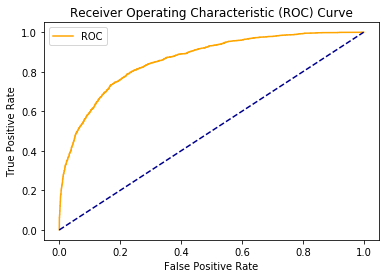

0.8608468056305205

In [22]:
y_probs = lr.predict_proba(X_test) # we have to get the probability values to plot roc curve
y_probs = y_probs[:, 1] # keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_test, y_probs)
# roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
lr_auc = roc_auc_score(y_test, y_probs)
lr_auc

In [23]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [24]:
pred = lda.fit(X_train, y_train).predict(X_test)
np.count_nonzero(pred)

2765

In [25]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.767     0.798     0.782      2835
           1      0.793     0.761     0.777      2882

    accuracy                          0.779      5717
   macro avg      0.780     0.780     0.779      5717
weighted avg      0.780     0.779     0.779      5717



In [26]:
results_ols = smf.ols('won_true ~ goals + shots + pim + powerPlayGoals + faceOffWinPercentage + giveaways + takeaways', data = df_train).fit()
results_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               won_true   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     1057.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:06:19   Log-Likelihood:                -6412.7
No. Observations:               12863   AIC:                         1.284e+04
Df Residuals:                   12855   BIC:                         1.290e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0136      0.007     -1.822      0.069      -0.028       0.001
goals                    0.1867      0.002     77.459      0.000       0.182       0.191
shots                   -0.3141      0.028    -11.042      0.000      -0.370      -0.258
pim                     -0.6347      0.080     -7.942      0.000      -0.791      -0.478
powerPlayGoals          -0.1274      0.031     -4.129      0.000      -0.188      -0.067
faceOffWinPercentage     0.0966      0.029      3.340      0.001       0.040       0.153
giveaways               -0.0982      0.027     -3.644      0.000      -0.151      -0.045
takeaways                0.2236      0.029      7.601      0.000       0.166       0.281
==============================================================================
Omnibus:                     1169.044   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              378.545
Skew:                           0.112   Prob(JB):                     6.31e-83
Kurtosis:                       2.190   Cond. No.                         75.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [28]:
get_score(SVC(), X_train, X_test, y_train, y_test)

C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7771558509707889

In [29]:
model = LogisticRegression(C=100000, tol=.0000001)

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    
    X_train_sm = X_train.join(y_train)
    result = smf.logit(formula='won_true ~ goals + shots + pim + powerPlayGoals + faceOffWinPercentage + giveaways + takeaways', data=X_train_sm).fit()
    print((model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean())

C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Optimization terminated successfully.
         Current function value: 0.464595
         Iterations 7
0.7818786076613609 0.7818786076613609
Optimization terminated successfully.
         Current function value: 0.463777
         Iterations 6
0.7759314325695295 0.7759314325695295
Optimization terminated successfully.
         Current function value: 0.463286
         Iterations 7
0.7748819310827357 0.7748819310827357


In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(LogisticRegression(), X_train, y_train, cv=3)
#cross_val_score(RandomForest(), X_train, y_train, cv=3)

C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.77085884, 0.78047927, 0.78415253])